# 1. Dataset

In [13]:
import pandas as pd

In [14]:
train = pd.read_csv(r'train.csv')
train

,id,text,class
0,14feb4e5,"Đến quán 2 lần thôi , rất là thích !\nQuán tuy...",1
1,9c6f6036,Đến quán vào tối chủ nhật . Có band hát . Khá ...,0
2,0f462cfe,Phục vụ lâu quá mặc dù khách rất vắng .\nĐợi g...,0
3,741fd21b,"Ko gian bé tí , quán chật chội , đông người nê...",0
4,5cd6dbbc,"Khi mình order , đặt bánh thì nhận được sự tiế...",1
...,...,...,...
26995,232ae053,Không gian đẹp . Đồ uống bình thg . Cheese ngo...,0
26996,8eda7af0,Chỉ có hai từ thất vọng mới diễn tả được cảm g...,0
26997,18cde420,"Hôm vào quán có bói bài Tarot , nên cũng bon c...",1
26998,2823add5,Va ̀ o ngô ̀ i đơ ̣ i 20p mơ ́ i đươ ̣ c phu ̣...,0


In [15]:
test = pd.read_csv(r'test.csv')
test

,id,text
0,3afca6c4,"Mình kêu 6 loại khác nhau , mỗi laoij 1 cục mà..."
1,a52dd7db,Ăn ở đây từ trc khi chủ nhà xây nhà mới . ch...
2,a95ec3a0,Các bạn đến ăn ngay và luôn đi nhé ! !\nMình t...
3,68c1c84a,Đây gần như quán ruột của mình luôn : ) ) đây ...
4,627bbd02,Tiếc là 25 năm sống ở Tây Ninh thì đây là lần ...
...,...,...
2995,e25b4674,"Quán này đc cái mạng nhanh , không gian thoải ..."
2996,e3a763d5,"Hôm mình đi quán mới khai trương được 1 , 2 ng..."
2997,2173e1e6,"Đã tới đây 1 lần rồi , nhưng hơi thất vọng , H..."
2998,217d5e8c,cả đám đi học về ghé quán ăn thử . cũng là ngư...


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      27000 non-null  object
 1   text    27000 non-null  object
 2   class   27000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 632.9+ KB


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      3000 non-null   object
 1   text    3000 non-null   object
dtypes: object(2)
memory usage: 47.0+ KB


In [18]:
import tensorflow as tf

In [19]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

# 2. Data preprocessing

In [20]:
import re
import string

In [21]:
stopwords = open(r'Vietnamese_stopwords.txt', encoding='utf-8').read()

In [22]:
stopwords

'a lô\na ha\nai\nai ai\nai nấy\nai đó\nalô\namen\nanh\nanh ấy\nba\nba ba\nba bản\nba cùng\nba họ\nba ngày\nba ngôi\nba tăng\nbao giờ\nbao lâu\nbao nhiêu\nbao nả\nbay biến\nbiết\nbiết bao\nbiết bao nhiêu\nbiết chắc\nbiết chừng nào\nbiết mình\nbiết mấy\nbiết thế\nbiết trước\nbiết việc\nbiết đâu\nbiết đâu chừng\nbiết đâu đấy\nbiết được\nbuổi\nbuổi làm\nbuổi mới\nbuổi ngày\nbuổi sớm\nbà\nbà ấy\nbài\nbài bác\nbài bỏ\nbài cái\nbác\nbán\nbán cấp\nbán dạ\nbán thế\nbây bẩy\nbây chừ\nbây giờ\nbây nhiêu\nbèn\nbéng\nbên\nbên bị\nbên có\nbên cạnh\nbông\nbước\nbước khỏi\nbước tới\nbước đi\nbạn\nbản\nbản bộ\nbản riêng\nbản thân\nbản ý\nbất chợt\nbất cứ\nbất giác\nbất kì\nbất kể\nbất kỳ\nbất luận\nbất ngờ\nbất nhược\nbất quá\nbất quá chỉ\nbất thình lình\nbất tử\nbất đồ\nbấy\nbấy chầy\nbấy chừ\nbấy giờ\nbấy lâu\nbấy lâu nay\nbấy nay\nbấy nhiêu\nbập bà bập bõm\nbập bõm\nbắt đầu\nbắt đầu từ\nbằng\nbằng cứ\nbằng không\nbằng người\nbằng nhau\nbằng như\nbằng nào\nbằng nấy\nbằng vào\nbằng được\nbằng ấy\nbển\

In [23]:
stopwords = stopwords.split('\n')
stopwords[:10]

['a lô',
 'a ha',
 'ai',
 'ai ai',
 'ai nấy',
 'ai đó',
 'alô',
 'amen',
 'anh',
 'anh ấy']

In [96]:
lst_train = []

for i in train['text']:
    cleaned_text = i.translate(str.maketrans('', '', string.punctuation))
    cleaned_text = re.sub('\s?[a-zA-Z]*[0-9]+[a-zA-Z]*\s?', ' ', cleaned_text)
    cleaned_text = re.sub('\s?[^wfjzZWFJ\s]*[wfjzZWFJ]+[^wfjzZWFJ\s]*\s?', ' ', cleaned_text)
    cleaned_text = cleaned_text.lower()
    cleaned_text = cleaned_text.split()
    
    for w in cleaned_text:
        if w in stopwords:
            cleaned_text.remove(w)
    
    cleaned_text = ' '.join(cleaned_text)
            
    lst_train.append(cleaned_text)

In [98]:
for i in range(3):
    print(lst_train[i])

quán thôi là quán nằm hẻm tìm quán rộng rãi thoáng mát sạch nhân viên phục vụ nhiệt tình siêu thương thực đơn phong phú đa dạng giá siêu rẻ thức nêm nếm hợp khẩu vị ngon miệng desert vừa quá ngấy rất ngon trà sữa uyên ương thơm đúng vị đã uống hongkong chung cho chất thích quán lắm
quán tối chủ nhật band hát ổn nhiên gian tầng hơi hẹp cả vỉa hè đồ uống ko ngon
phục vụ quá mặc khách vắng đợi mới được ly cà phê ông chỉ khéo quảng bá với chắc quay nữa


In [99]:
lst_test = []

for i in test['text']:
    cleaned_text = i.translate(str.maketrans('', '', string.punctuation))
    cleaned_text = re.sub('\s?[a-zA-Z]*[0-9]+[a-zA-Z]*\s?', ' ', cleaned_text)
    cleaned_text = re.sub('\s?[^wfjzZWFJ\s]*[wfjzZWFJ]+[^wfjzZWFJ\s]*\s?', ' ', cleaned_text)
    cleaned_text = cleaned_text.lower()
    cleaned_text = cleaned_text.split()
    
    for w in cleaned_text:
        if w in stopwords:
            cleaned_text.remove(w)
    
    cleaned_text = ' '.join(cleaned_text)
            
    lst_test.append(cleaned_text)

In [100]:
for i in range(3):
    print(lst_test[i])

kêu khác mỗi cục nào cứ như đang cuối ngon lại cục khoai môn chiên mấy loại há cảo xíu mại bánh xẹp ăn ngán cực kỳ làm cục to tổ bố ép mua cái giá ko ăn cái ở mà người khen ngon
ở trc chủ xây mới chất lg ko đổi giá tăng từ từ mìh kiu thường trứng hơi no tẹo cực kì ngonnn đi vạn kiếp rẽ hẻm biển hoa đàm ni đi chừng hẻm để xe ngoài dọc dãy chú chủ sắp xếp xe nhưng khuyến khích b mua ăn chỗ bàn ghế sạch ly uống dùng kết phục vụ vk ck chủ miễn bàn cực kì thân thiện dạo này có nữa phụ nhưng ko dc lanh lẹ lắm quán bán sáng chừng là hết hành phi ngon và giòn lắm bánh thì gọi tới đâu làm tới ko qá lâu và bánh còn ấm
đi trước chỉ súp cua súp óc heo tới quán mình đã loại rong biển hến thập cẩm đây thêm súp còi điệp chỉ có súp âu nha menu món cũng muôn ah bánh trà xanh cực ngon món khoái khẩu mình mình có thói quen chộp hình thức ăn trước khi ăn các bạn đến súp sài gòn và cảm nhé


# 3. One-hot representation

In [110]:
### Vocabulary size
voc_size=5000

In [111]:
one_hot_train = [one_hot(sentence, voc_size) for sentence in lst_train]
one_hot_test = [one_hot(sentence, voc_size) for sentence in lst_test]

In [112]:
one_hot_train[1]

[221,
 1231,
 110,
 2190,
 3886,
 4460,
 4656,
 3302,
 1528,
 773,
 4215,
 2851,
 1971,
 1804,
 1790,
 1279,
 2255,
 3092,
 1450]

# 4. Padding sequence

In [113]:
### Sentence length
sentence_len = 30

In [114]:
padding_train = pad_sequences(one_hot_train, padding='pre', maxlen=sentence_len)
padding_test = pad_sequences(one_hot_test, padding='pre', maxlen=sentence_len)

In [115]:
padding_train[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        221, 1231,  110, 2190, 3886, 4460, 4656, 3302, 1528,  773, 4215,
       2851, 1971, 1804, 1790, 1279, 2255, 3092, 1450])

# 5. Train Val split

In [132]:
import numpy as np

In [133]:
padding_train = np.array(padding_train)
padding_test = np.array(padding_test)

In [134]:
y = np.array(train['class'])

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(padding_train, y, test_size=0.25, random_state=11)

In [136]:
print('Shape of X_train:', X_train.shape)
print('Shape of X_val:', X_val.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_val:', y_val.shape)

Shape of X_train: (20250, 30)
Shape of X_val: (6750, 30)
Shape of y_train: (20250,)
Shape of y_val: (6750,)


# 6. Word embedding representation and model

In [116]:
### Number of features to represent a word
num_features = 50

In [121]:
model = Sequential()
model.add(Embedding(voc_size, num_features, input_length=sentence_len))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [122]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 50)            250000    
                                                                 
 lstm (LSTM)                 (None, 100)               60400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 310,501
Trainable params: 310,501
Non-trainable params: 0
_________________________________________________________________


# 7. Model training

In [137]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10)

callback_list = [early_stop]

In [138]:
### Finally Training
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=100,batch_size=64, callbacks=callback_list)

Epoch 1/100
317/317 [==============================] - 17s 46ms/step - loss: 0.4541 - accuracy: 0.7853 - val_loss: 0.4034 - val_accuracy: 0.8135
Epoch 2/100
317/317 [==============================] - 14s 44ms/step - loss: 0.3636 - accuracy: 0.8456 - val_loss: 0.4011 - val_accuracy: 0.8225
Epoch 3/100
317/317 [==============================] - 13s 42ms/step - loss: 0.3354 - accuracy: 0.8599 - val_loss: 0.4072 - val_accuracy: 0.8200
Epoch 4/100
317/317 [==============================] - 13s 42ms/step - loss: 0.3098 - accuracy: 0.8727 - val_loss: 0.4194 - val_accuracy: 0.8160
Epoch 5/100
317/317 [==============================] - 14s 43ms/step - loss: 0.2818 - accuracy: 0.8855 - val_loss: 0.4714 - val_accuracy: 0.8087
Epoch 6/100
317/317 [==============================] - 13s 42ms/step - loss: 0.2581 - accuracy: 0.8946 - val_loss: 0.4817 - val_accuracy: 0.8089
Epoch 7/100
317/317 [==============================] - 14s 45ms/step - loss: 0.2385 - accuracy: 0.9024 - val_loss: 0.5277 - val_ac

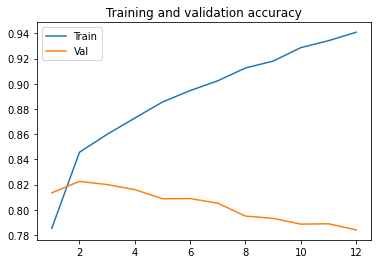

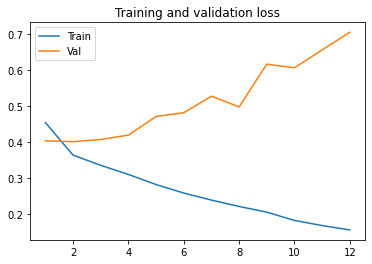

In [140]:
import matplotlib.pyplot as plt

# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of loss results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(1, len(acc)+1)

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label='Train')
plt.plot(epochs, val_acc, label='Val')
plt.title('Training and validation accuracy')
plt.legend()


plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label='Train')
plt.plot(epochs, val_loss, label='Val')
plt.title('Training and validation loss')
plt.legend()

# 8. Address overfitting

In [157]:
from tensorflow.keras.layers import Dropout

## Creating model
model=Sequential()
model.add(Embedding(voc_size, num_features, input_length=sentence_len))
model.add(Dropout(0.7))
model.add(LSTM(5))
model.add(Dropout(0.7))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [158]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 30, 50)            250000    
                                                                 
 dropout_8 (Dropout)         (None, 30, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 5)                 1120      
                                                                 
 dropout_9 (Dropout)         (None, 5)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 251,126
Trainable params: 251,126
Non-trainable params: 0
_________________________________________________________________


In [159]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=100,batch_size=64, callbacks=callback_list)

Epoch 1/100
317/317 [==============================] - 9s 22ms/step - loss: 0.5964 - accuracy: 0.6865 - val_loss: 0.4596 - val_accuracy: 0.8147
Epoch 2/100
317/317 [==============================] - 6s 19ms/step - loss: 0.4830 - accuracy: 0.7664 - val_loss: 0.4182 - val_accuracy: 0.8249
Epoch 3/100
317/317 [==============================] - 6s 20ms/step - loss: 0.4627 - accuracy: 0.7794 - val_loss: 0.4103 - val_accuracy: 0.8179
Epoch 4/100
317/317 [==============================] - 6s 20ms/step - loss: 0.4504 - accuracy: 0.7913 - val_loss: 0.4095 - val_accuracy: 0.8196
Epoch 5/100
317/317 [==============================] - 6s 20ms/step - loss: 0.4314 - accuracy: 0.7969 - val_loss: 0.4033 - val_accuracy: 0.8231
Epoch 6/100
317/317 [==============================] - 6s 20ms/step - loss: 0.4307 - accuracy: 0.7993 - val_loss: 0.4057 - val_accuracy: 0.8201
Epoch 7/100
317/317 [==============================] - 6s 20ms/step - loss: 0.4205 - accuracy: 0.8006 - val_loss: 0.4038 - val_accuracy:

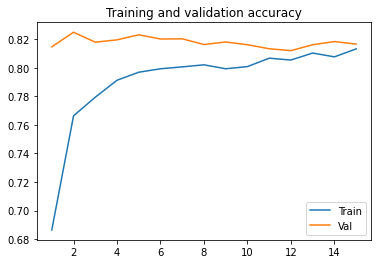

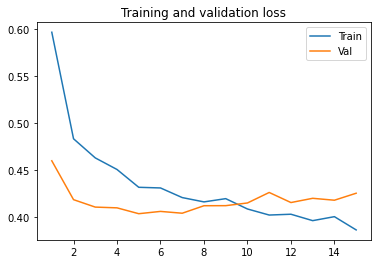

In [160]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of loss results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(1, len(acc)+1)

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label='Train')
plt.plot(epochs, val_acc, label='Val')
plt.title('Training and validation accuracy')
plt.legend()


plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label='Train')
plt.plot(epochs, val_loss, label='Val')
plt.title('Training and validation loss')
plt.legend()

# 9. Prediction

In [188]:
predictions = model.predict(padding_test) > 0.5
predictions = [0 if i==False else 1 for i in predictions]

In [189]:
df = test[['id']].copy()
df['class'] = predictions

In [190]:
df

,id,class
0,3afca6c4,0
1,a52dd7db,1
2,a95ec3a0,1
3,68c1c84a,1
4,627bbd02,1
...,...,...
2995,e25b4674,0
2996,e3a763d5,1
2997,2173e1e6,0
2998,217d5e8c,0


In [203]:
df.set_index('id', inplace=True)

In [204]:
df

,class
id,
3afca6c4,0
a52dd7db,1
a95ec3a0,1
68c1c84a,1
627bbd02,1
...,...
e25b4674,0
e3a763d5,1
2173e1e6,0


In [205]:
df.to_csv('submission.csv')

# 10. Try another architecture

In [224]:
## Creating model
model=Sequential()
model.add(Embedding(voc_size, num_features, input_length=sentence_len))
model.add(Dropout(0.7))
model.add(LSTM(5))
model.add(Dropout(0.7))
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [225]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 30, 50)            250000    
                                                                 
 dropout_10 (Dropout)        (None, 30, 50)            0         
                                                                 
 lstm_6 (LSTM)               (None, 5)                 1120      
                                                                 
 dropout_11 (Dropout)        (None, 5)                 0         
                                                                 
 dense_6 (Dense)             (None, 8)                 48        
                                                                 
 dropout_12 (Dropout)        (None, 8)                 0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [226]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=100,batch_size=64, callbacks=callback_list)

Epoch 1/100
317/317 [==============================] - 10s 23ms/step - loss: 0.6825 - accuracy: 0.5260 - val_loss: 0.5914 - val_accuracy: 0.7883
Epoch 2/100
317/317 [==============================] - 7s 21ms/step - loss: 0.5929 - accuracy: 0.6798 - val_loss: 0.4707 - val_accuracy: 0.8129
Epoch 3/100
317/317 [==============================] - 7s 21ms/step - loss: 0.5575 - accuracy: 0.7242 - val_loss: 0.4530 - val_accuracy: 0.8169
Epoch 4/100
317/317 [==============================] - 7s 21ms/step - loss: 0.5430 - accuracy: 0.7338 - val_loss: 0.4486 - val_accuracy: 0.8153
Epoch 5/100
317/317 [==============================] - 7s 22ms/step - loss: 0.5369 - accuracy: 0.7381 - val_loss: 0.4395 - val_accuracy: 0.8203
Epoch 6/100
317/317 [==============================] - 7s 21ms/step - loss: 0.5266 - accuracy: 0.7444 - val_loss: 0.4328 - val_accuracy: 0.8179
Epoch 7/100
317/317 [==============================] - 7s 21ms/step - loss: 0.5199 - accuracy: 0.7456 - val_loss: 0.4329 - val_accuracy

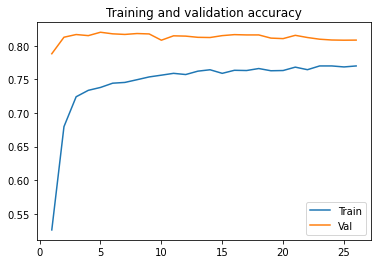

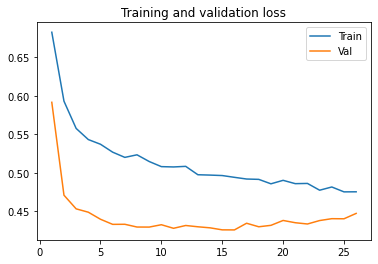

In [230]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of loss results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(1, len(acc)+1)

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label='Train')
plt.plot(epochs, val_acc, label='Val')
plt.title('Training and validation accuracy')
plt.legend()


plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label='Train')
plt.plot(epochs, val_loss, label='Val')
plt.title('Training and validation loss')
plt.legend()

# 11. Try bidirectional RNN

In [231]:
from tensorflow.keras.layers import Bidirectional

In [233]:
## Creating model
model=Sequential()
model.add(Embedding(voc_size, num_features, input_length=sentence_len))
model.add(Dropout(0.7))
model.add(Bidirectional(LSTM(5)))
model.add(Dropout(0.7))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [234]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 30, 50)            250000    
                                                                 
 dropout_14 (Dropout)        (None, 30, 50)            0         
                                                                 
 bidirectional (Bidirectiona  (None, 10)               2240      
 l)                                                              
                                                                 
 dropout_15 (Dropout)        (None, 10)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 252,251
Trainable params: 252,251
Non-trainable params: 0
________________________________________________

In [235]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=100,batch_size=64, callbacks=callback_list)

Epoch 1/100
317/317 [==============================] - 14s 31ms/step - loss: 0.6052 - accuracy: 0.6665 - val_loss: 0.4319 - val_accuracy: 0.8058
Epoch 2/100
317/317 [==============================] - 8s 26ms/step - loss: 0.4534 - accuracy: 0.8117 - val_loss: 0.4079 - val_accuracy: 0.8222
Epoch 3/100
317/317 [==============================] - 8s 24ms/step - loss: 0.4264 - accuracy: 0.8311 - val_loss: 0.4048 - val_accuracy: 0.8227
Epoch 4/100
317/317 [==============================] - 8s 25ms/step - loss: 0.4067 - accuracy: 0.8357 - val_loss: 0.4024 - val_accuracy: 0.8225
Epoch 5/100
317/317 [==============================] - 8s 24ms/step - loss: 0.3986 - accuracy: 0.8385 - val_loss: 0.4063 - val_accuracy: 0.8191
Epoch 6/100
317/317 [==============================] - 8s 25ms/step - loss: 0.3907 - accuracy: 0.8421 - val_loss: 0.3997 - val_accuracy: 0.8241
Epoch 7/100
317/317 [==============================] - 8s 25ms/step - loss: 0.3823 - accuracy: 0.8501 - val_loss: 0.4053 - val_accuracy

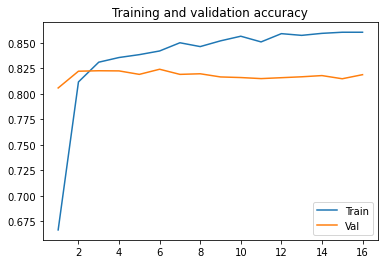

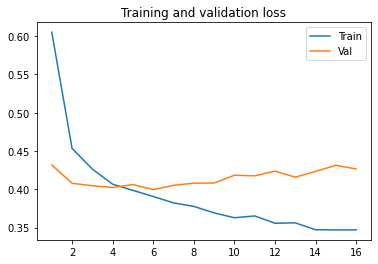

In [236]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of loss results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(1, len(acc)+1)

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label='Train')
plt.plot(epochs, val_acc, label='Val')
plt.title('Training and validation accuracy')
plt.legend()


plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label='Train')
plt.plot(epochs, val_loss, label='Val')
plt.title('Training and validation loss')
plt.legend()